In [6]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Tanmay49/SEM7/main/ML/sales_data_sample.csv', encoding ="unicode_escape")

print(df.head())
df.shape

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES   
0        10107               30      95.70                2  2871.00  \
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...   
0   2/24/2003 0:00  Shipped       1         2     2003  ...  \
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE   
0        897 Long Airport Avenue           NaN            NYC    NY  \
1             59 rue de l'Abbaye           NaN

(2823, 25)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

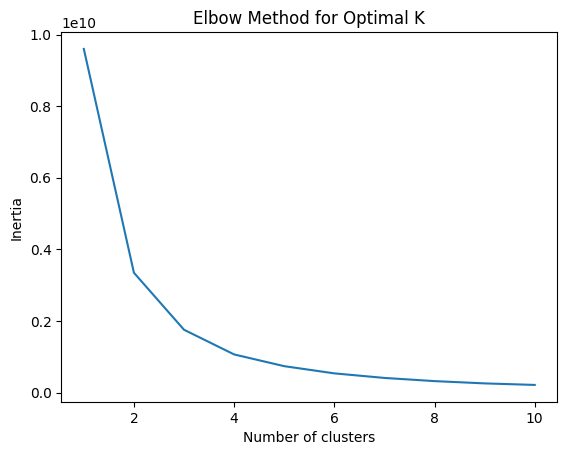

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[[ 'ORDERNUMBER', 'PRICEEACH', 'SALES']]

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [8]:
# Optimal K = 4
kmeans = KMeans(n_clusters=4)
X['Cluster']  = kmeans.fit_predict(X)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/59/220nbqf94m9fryjfpnrmnblm0000gn/T/ipykernel_12466/1164357733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster']  = kmeans.fit_predict(X)


In [9]:
X

,ORDERNUMBER,PRICEEACH,SALES,Cluster
0,10107,95.70,2871.00,2
1,10121,81.35,2765.90,2
2,10134,94.74,3884.34,2
3,10145,83.26,3746.70,2
4,10159,100.00,5205.27,1
...,...,...,...,...
2818,10350,100.00,2244.40,0
2819,10373,100.00,3978.51,2
2820,10386,100.00,5417.57,1
2821,10397,62.24,2116.16,0
